In [2]:
import tensorflow as tf

In [3]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/content/FlowersDataset/")

Found 3770 files belonging to 3 classes.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/content/FlowersDataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/gdrive/MyDrive/content/FlowersDataset/Testing_set_flower.csv
/content/gdrive/MyDrive/content/FlowersDataset/sample_submission.csv
/content/gdrive/MyDrive/content/FlowersDataset/LICENSE.txt
/content/gdrive/MyDrive/content/FlowersDataset/train/daisy/4407065098_ef25f1ccac_n.jpg
/content/gdrive/MyDrive/content/FlowersDataset/train/daisy/3640845041_80a92c4205_n.jpg
/content/gdrive/MyDrive/content/FlowersDataset/train/daisy/4511693548_20f9bd2b9c_m.jpg
/content/gdrive/MyDrive/content/FlowersDataset/train/daisy/2551708158_1f10e81e11.jpg
/content/gdrive/MyDrive/content/FlowersDataset/train/daisy/14816364517_2423021484_m.jpg
/content/gdrive/MyDrive/content/FlowersDataset/train/daisy/18354545086_693ea7bc2a.jpg
/content/gdrive/MyDrive/content/FlowersDataset/train/daisy/16737503507_431768a927.jpg
/content/gdrive/MyDrive/content/FlowersDataset/train/daisy/19653086178_28156b7ce4_m.jpg
/content/gdrive/MyDrive/content/FlowersDataset/train/daisy/10172567486_2748826a8b.jpg
/content/gdrive/MyDriv

In [6]:
os.listdir('/content/gdrive/MyDrive/content/FlowersDataset/train')

['daisy', 'rose', 'dandelion', 'tulip', 'sunflower']

In [7]:
import cv2
DIR = '/content/gdrive/MyDrive/content/FlowersDataset/train'
check_labels = []
X = []
Y = []
ID = -1
for folder_name  in os.listdir(DIR):
    if folder_name not in check_labels:
        ID = 1
    for img_name in os.listdir(DIR+"/"+folder_name):
        img = cv2.imread(DIR+"/"+folder_name+"/"+img_name)
        img = cv2.resize(img,(150, 150))
        X.append(img)
        Y.append(ID)

        trainx = np.array(X)
        trainy = np.array(Y)

In [8]:
len(X), len(Y)

(2746, 2746)

In [9]:
trainx.shape, trainy.shape

((2746, 150, 150, 3), (2746,))

In [10]:
DIR = '/content/gdrive/MyDrive/content/FlowersDataset/test'
check_labels = []
X = []
Y = []
ID = -1
# for folder_name  in os.listdir(DIR):
#     print(folder_name+'==>');
#     if folder_name not in check_labels:
#         ID = 1
for img_name in os.listdir(DIR+"/"):
    # print(img_name+',')
    img = cv2.imread(DIR+"/"+img_name)
    img = cv2.resize(img,(150, 150))
    X.append(img)
    Y.append(ID)

    testx = np.array(X)
    testy = np.array(Y)

In [11]:
len(X), len(Y)

(924, 924)

In [12]:
testx.shape, testy.shape

((924, 150, 150, 3), (924,))

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam  # Import Adam optimizer from keras.optimizers

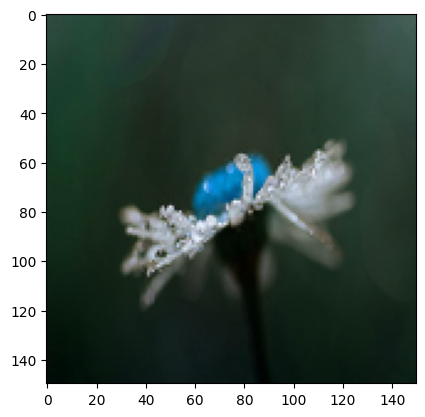

In [14]:
import matplotlib.pyplot as plt

plt.imshow(trainx[0])

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (2,2), activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size = (2,2), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,kernel_size = (2,2), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,kernel_size = (2,2), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,kernel_size = (2,2), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,kernel_size = (2,2), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0